In [3]:
import numpy as np
import pandas as pd
import sklearn

from scipy import interp
import matplotlib.pyplot as plt
from numpy import ravel

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.neural_network import MLPClassifier
import itertools

import sklearn.metrics as metrics

import matplotlib.pyplot as plt

import random

import scipy

from sklearn.preprocessing import StandardScaler  


# Set seed
random.seed(2020)
np.random.seed(2020)

In [4]:
A = pd.read_excel("C:/Users/arman/Desktop/Tables/mortality_all.xlsx")
print(A.shape)

y = A["Mortality"]
y = y.ravel()
print(y.shape)


sts = A["STS"]
sts = np.array(sts, dtype = float)

sts_2 = A["STSACC"]
sts_2 = np.array(sts_2, dtype = float)

X = A
del X["Mortality"]
del X["ID"]
del X["STS"]
del X["STSACC"]
X = np.array(X, dtype = float)
print(X.shape)

(451, 87)
(451,)
(451, 83)


In [5]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X)
X = pd.DataFrame(data = X) # Create data frame

feature_scaler = StandardScaler()  
X = feature_scaler.fit_transform(X)

In [6]:
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import numpy as np

In [7]:
model = XGBClassifier(scale_pos_weight=17)
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=17, seed=None, silent=None,
       subsample=1, verbosity=1)

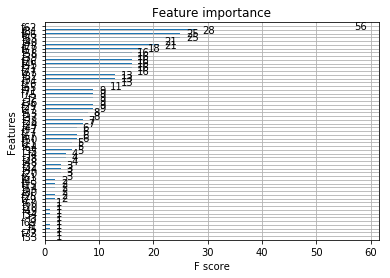

In [8]:
plot_importance(model)
pyplot.show()


In [10]:
X = pd.read_excel("C:/Users/arman/Desktop/Tables/mortality_all.xlsx")
del X["Mortality"]
del X["ID"]
del X["STS"]
del X["STSACC"]

sorted_idx = np.argsort(model.feature_importances_)[::-1]
print(sorted_idx)
for index in sorted_idx[0:10]:
    print([X.columns[index], model.feature_importances_[index]]) 

[16 62 33 66 35 57 50 63 77 76 48 37 81 72 79 31 82 36 78 61 38 69 39 21
 24 65 27 45 17 58 29 40 80 47 20 44 64 71 67  5  2 75 34 28  4  1 11 43
 14 25 32 10 13 60 15 49  3  6 12  7  8  9 18 41 19 54 74 73 70 68 59 56
 55 53 22 52 51 46 42 30 26 23  0]
['pre_hstnt_value', 0.09650911]
['MaxLeu', 0.09460853]
['Septum', 0.067317896]
['MaxCrea', 0.042272255]
['LA', 0.04157843]
['Fever', 0.040745836]
['Perikarderguss', 0.03778614]
['MaxCRP', 0.03689984]
['Fluoroscopy.time', 0.036408376]
['Contrast.agent.use', 0.03493915]


In [8]:
X1 = pd.read_excel("C:/Users/arman/Desktop/Tables/Baseline August (30 features + ID).xlsx")
del X1["ID"]
feature_names = np.array(X1.columns.values)
X1 = np.array(X1, dtype = float)
X1 = imp.fit_transform(X1)
X1 = pd.DataFrame(data = X1) # Create data frame
X1 = feature_scaler.fit_transform(X1)

In [9]:
# use feature importance for feature selection
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier(scale_pos_weight=17)
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=17, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [10]:
X1 = pd.read_excel("Baseline August (30 features + ID).xlsx")
del X1["ID"]
sorted_idx = np.argsort(model.feature_importances_)[::-1]
print(sorted_idx)
for index in sorted_idx[0:10]:
    print([X1.columns[index], model.feature_importances_[index]]) 

[39 29  0 14 16 27 17 47 33 25 20 28  8 34 32 40 31  2 45 21 38 24 13  5
 43 19 46  4  3 30 35 10 41  9 36 37 26 15 49 23 44 42 12 11 18  7  6 22
 48  1]
['TAPSE', 0.17151733]
['RCA_Ao', 0.134166]
['ValveType', 0.10390436]
['CRP', 0.064180054]
['pre_hstnt_value', 0.06411412]
['Grad der Verlaklung', 0.041515816]
['pre_krea_value', 0.03629989]
['E_E', 0.035495892]
['Septum', 0.033663996]
['Minimale Durchmesser', 0.03050367]


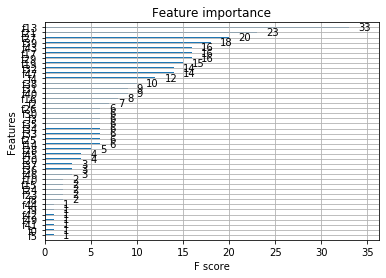

In [11]:
plot_importance(model)
pyplot.show()